# 1. Load the libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Projects/Medical Price Prediction')
os.listdir()

['Insurance.ipynb',
 'medical.pdf',
 'insurance.csv',
 'medical (1).gdoc',
 'medical.gdoc']

In [ ]:
df=pd.read_csv('insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#deals with duplicate date
df.duplicated().sum()

1

In [ ]:
#Duplicate value remove
df.drop_duplicates(inplace=True)

In [ ]:
#St of dataset
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


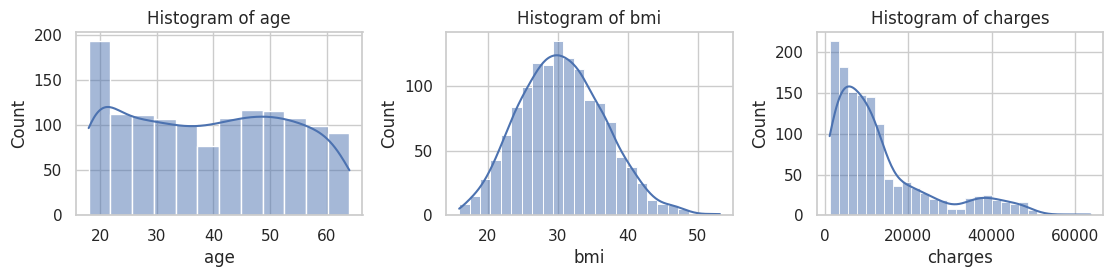

In [ ]:
# Univariate Analyssis
sns.set_theme(style= 'whitegrid')
ulist = ['age', 'bmi', 'charges']
plot_num = 1
plt.figure(figsize = (15,10))
for i in ulist:
 ax = plt.subplot(4,4,plot_num)
 sns.histplot(df[i], kde= True, color= 'b')
 plt.title('Histogram of ' + i)
 plot_num +=1
plt.tight_layout()

1. Age : In age group 20 their are maximum customers where as age group of 40 has the lo
west customers. And the rest of age group has a count value around 100.
2. BMI : It is a slightly right skewed graph. Where most of the customers have bmi of 25
to 35. Maximum customers are found in bmi group 30.
3. Charges : It is a rightly skewed graph. most of the customers have the charge value o
f 1120 to 15000.


Text(0.5, 0, 'Smoker')

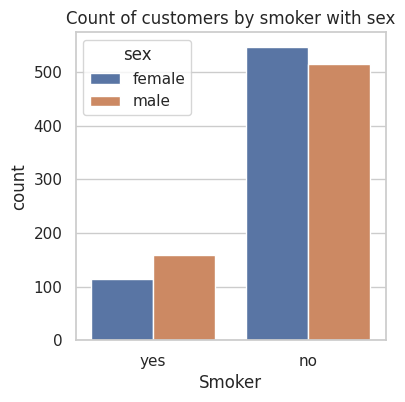

In [ ]:
#bivariate analysis
plt.figure(figsize=(4,4))
sns.countplot(x=df['smoker'], hue = df.sex)
plt.title('Count of customers by smoker with sex')
plt.xlabel('Smoker')

1. Most of the customers do not smoke.
2. As compared to females there are more number of male smokers.

[Text(0.5, 0, 'age')]

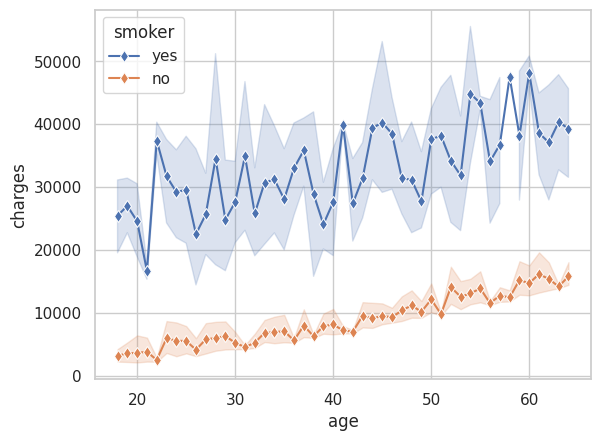

In [ ]:
fig= sns.lineplot(x= df.age, y=df.charges, markevery= 1, marker ='d', data = df, hue =df.smoker)
fig.set(xlabel = 'age')

1. People who smokes are charged a lot higher than non-smokers.
2. Non-smokers are charged less than 20,000 while smokers are charged more than 15,000.

<Axes: xlabel='charges', ylabel='region'>

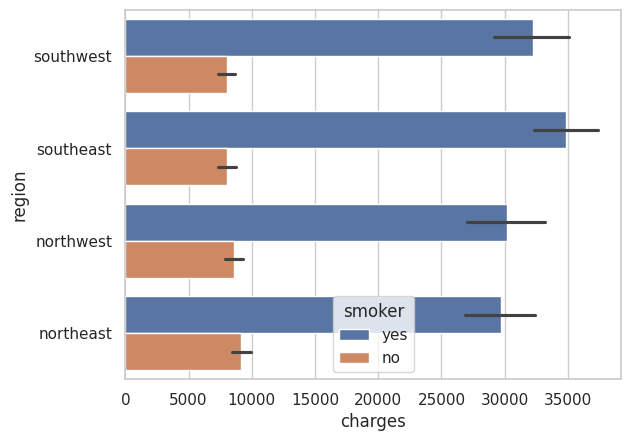

In [ ]:
sns.barplot(data=df, x="charges", y="region", hue="smoker")

1. Smokers from southeast and non-smokers from northeast are being charged the maximum premium.
2. Smokers from the northeast and non-smokers from southwest are being charged the least premium.

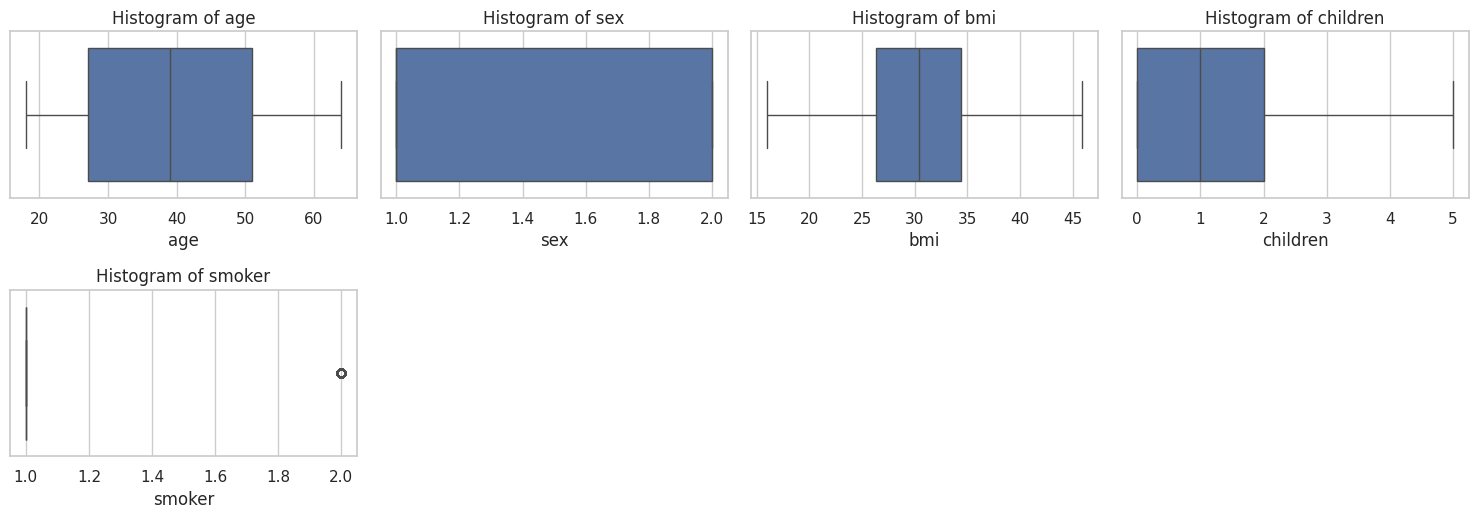

In [ ]:
sns.set_theme(style="whitegrid")
ulist=['age','sex','bmi','children','smoker']
plot_num=1
plt.figure(figsize=(15,10))
for i in ulist:
  ax=plt.subplot(4,4,plot_num)
  sns.boxplot(df[i],orient='h')
  plt.title('Histogram of '+i)
  plot_num+=1
plt.tight_layout()

In [ ]:
df.loc[df['bmi']>46,'bmi']=30.4

In [ ]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
df['sex']=df["sex"].replace(["female","male"],[2,1])

In [ ]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df['smoker']=df["smoker"].replace(['yes','no'],[2,1])

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,2,southwest,16884.92400
1,18,1,33.770,1,1,southeast,1725.55230
2,28,1,33.000,3,1,southeast,4449.46200
3,33,1,22.705,0,1,northwest,21984.47061
4,32,1,28.880,0,1,northwest,3866.85520


<Axes: xlabel='charges', ylabel='Density'>

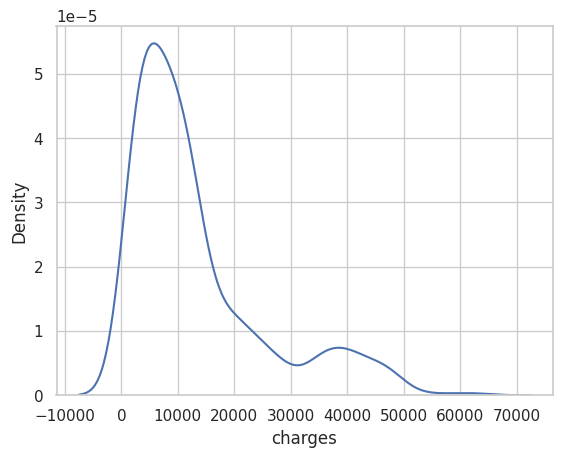

In [ ]:
sns.kdeplot(data=df['charges'])

In [ ]:
#log transformation the output
df['charges_log']=pd.DataFrame({"charges":np.log(df["charges"])})
df.head()

,age,sex,bmi,children,smoker,region,charges,charges_log
0,19,2,27.900,0,2,southwest,16884.92400,9.734176
1,18,1,33.770,1,1,southeast,1725.55230,7.453302
2,28,1,33.000,3,1,southeast,4449.46200,8.400538
3,33,1,22.705,0,1,northwest,21984.47061,9.998092
4,32,1,28.880,0,1,northwest,3866.85520,8.260197


<Axes: xlabel='charges_log', ylabel='Density'>

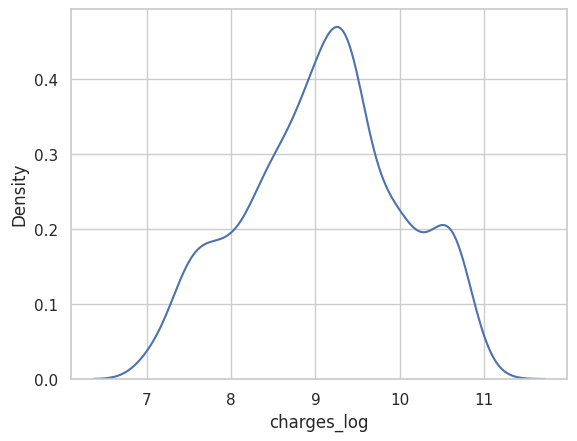

In [ ]:
sns.kdeplot(data=df['charges_log'])

In [ ]:
#separate input and output
Y=df["charges_log"]
X=df[['age','sex','bmi','children','smoker']]

In [ ]:
#Perform the train test split
from sklearn.model_selection import train_test_split as split
x_train,x_test,y_train,y_test=split(X,Y,test_size=0.25,random_state=0)

In [ ]:
#Data Transformation on Numerical Data : Standardization

#Import Class
from sklearn.preprocessing import StandardScaler

#Create object for StandardScaler class
scaler= StandardScaler()

x_train_transformed=scaler.fit_transform(x_train)
print(x_train_transformed.shape, x_train_transformed, sep="\n\n\n\n")

x_test_transformed=scaler.transform(x_test)
print(x_test_transformed.shape, x_test_transformed, sep="\n\n\n\n")

(1002, 5)



[[-0.51560926  0.99006927 -0.17336403 -0.07370881 -0.50093545]
 [ 1.53904979  0.99006927 -1.47534968 -0.8943336  -0.50093545]
 [-1.43666331 -1.01003034 -1.0338817  -0.07370881 -0.50093545]
 ...
 [-0.72816019 -1.01003034  1.1544889   0.74691597 -0.50093545]
 [-1.43666331 -1.01003034  0.85097966 -0.8943336  -0.50093545]
 [ 0.97224729 -1.01003034 -0.72175004  0.74691597 -0.50093545]]
(335, 5)



[[-1.50751362  0.99006927  1.59078343 -0.8943336  -0.50093545]
 [ 0.54714542  0.99006927 -0.21130268 -0.07370881 -0.50093545]
 [ 0.68884605 -1.01003034  0.13014521 -0.07370881 -0.50093545]
 ...
 [ 0.83054667 -1.01003034 -0.09748672 -0.07370881 -0.50093545]
 [ 0.97224729 -1.01003034 -1.67194089 -0.8943336   1.99626517]
 [ 1.75160073 -1.01003034  1.30969248 -0.8943336  -0.50093545]]


In [ ]:
cols=['age','sex','bmi','children','smoker']

In [ ]:
#standarization
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_train_transformed=pd.DataFrame(scale.fit_transform(x_train),columns=cols,index=x_train.index)
x_test_transformed=pd.DataFrame(scale.transform(x_test),columns=cols,index=x_test.index)

x_train_transformed.head()

,age,sex,bmi,children,smoker
1075,-0.515609,0.990069,-0.173364,-0.073709,-0.500935
131,1.539050,0.990069,-1.475350,-0.894334,-0.500935
15,-1.436663,-1.010030,-1.033882,-0.073709,-0.500935
825,1.751601,0.990069,0.212058,0.746916,-0.500935
1137,-0.940711,0.990069,-1.442584,-0.894334,-0.500935


In [ ]:
from sklearn.linear_model import LinearRegression
LR_model=LinearRegression()
LR_model.fit(x_train_transformed, y_train)
y_pred_LR=LR_model.predict(x_test_transformed)

In [ ]:
from sklearn import metrics
mae_LR =metrics.mean_absolute_error(y_test,y_pred_LR)
print("Mean absolute error", mae_LR)
print("Mean Squared Error",metrics.mean_squared_error(y_test,y_pred_LR))
print("Root mean squared error",np.sqrt(metrics.mean_squared_error(y_test,y_pred_LR)))

Mean absolute error 0.29727968948833294
Mean Squared Error 0.21380613460652073
Root mean squared error 0.46239175447505626


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
KNN_model=KNeighborsRegressor()
KNN_model.fit(x_train_transformed, y_train)
y_pred_KNN=KNN_model.predict(x_test_transformed)

In [ ]:
mae_KNN =metrics.mean_absolute_error(y_test,y_pred_LR)
print("Mean absolute error",mae_KNN)
print("Mean Squared Error",metrics.mean_squared_error(y_test,y_pred_KNN))
print("Root mean squared error",np.sqrt(metrics.mean_squared_error(y_test,y_pred_KNN)))

Mean absolute error 0.29727968948833294
Mean Squared Error 0.1727645856294601
Root mean squared error 0.415649594766385


In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()
dt_model.fit(x_train_transformed, y_train)
y_pred_dt=dt_model.predict(x_test_transformed)

mae_dt =metrics.mean_absolute_error(y_test,y_pred_dt)
print("Mean absolute error",mae_dt)
print("Mean Squared Error",metrics.mean_squared_error(y_test,y_pred_dt))
print("Root mean squared error",np.sqrt(metrics.mean_squared_error(y_test,y_pred_dt)))

Mean absolute error 0.23979946548893993
Mean Squared Error 0.22828825158822522
Root mean squared error 0.47779519837292755


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_model=RandomForestRegressor()
rf_model.fit(x_train_transformed, y_train)
y_pred_rf=rf_model.predict(x_test_transformed)

mae_rf =metrics.mean_absolute_error(y_test,y_pred_rf)
print("Mean absolute error",mae_rf)
print("Mean Squared Error",metrics.mean_squared_error(y_test,y_pred_rf))
print("Root mean squared error",np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf)))

Mean absolute error 0.21845030606622917
Mean Squared Error 0.1474538937380495
Root mean squared error 0.383997257461625


In [ ]:
#Supprt vector Regression
from sklearn.svm import SVR
svr_model=SVR()
svr_model.fit(x_train_transformed, y_train)
y_pred_svr=svr_model.predict(x_test_transformed)

mae_svr =metrics.mean_absolute_error(y_test,y_pred_svr)
print("Mean absolute error",mae_svr)
print("Mean Squared Error",metrics.mean_squared_error(y_test,y_pred_svr))
print("Root mean squared error",np.sqrt(metrics.mean_squared_error(y_test,y_pred_svr)))

Mean absolute error 0.18506662854372713
Mean Squared Error 0.1416912372989893
Root mean squared error 0.3764189651159852


In [ ]:
## Evaluation
evaluation =pd.DataFrame({"Algorithms":["Liniar Reg","KNN Reg","Deceision Tree","Random Forest","support vactoe reg"],"MAE":[mae_LR,mae_KNN,mae_dt,mae_rf,mae_svr]})

In [ ]:
evaluation

,Algorithms,MAE
0,Liniar Reg,0.297280
1,KNN Reg,0.297280
2,Deceision Tree,0.239799
3,Random Forest,0.218450
4,support vactoe reg,0.185067


In [ ]:
models=["Liniar Reg","Deceision Tree","Random Forest","support vactoe reg"]
r2_score_=[mae_LR,mae_dt,mae_rf,mae_svr]

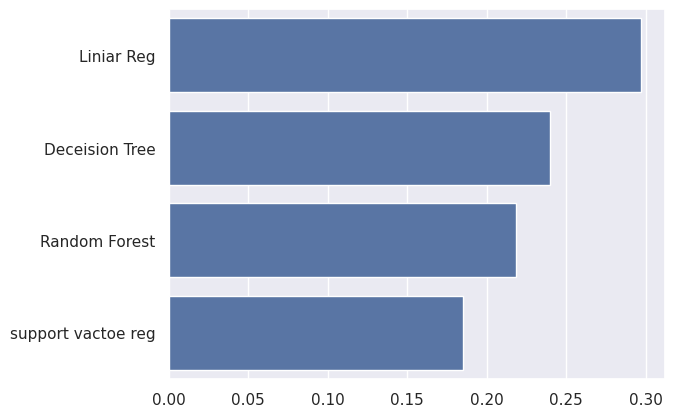

In [ ]:
sns.barplot(x=r2_score_,y=models)
sns.set_theme(style="darkgrid")

#### Linear Regression gives us the highest Mean Absolute score than "Deceision Tree","Random Forest","support vactoe reg"